# 和KNN一样，使用SVM之前要做数据标准化处理

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

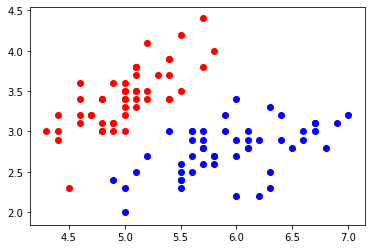

In [2]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")

In [3]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
# 绘制决策边界的函数
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


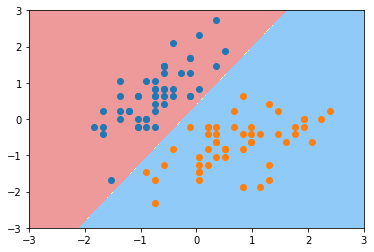

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


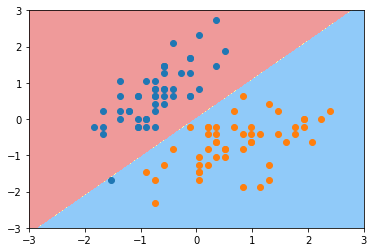

In [8]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

C越大，代表容错空间越小，C越小，代表容错空间越大

In [9]:
svc.coef_ #一个二维数组，说明SVM可以处理多分类问题

array([[ 4.03239967, -2.50700848]])

In [10]:
svc.intercept_

array([0.92734027])

In [11]:
# 绘制决策边界的函数,并绘制出支撑向量
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b= model.intercept_[0]
    
    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color="black")
    plt.plot(plot_x[down_index], down_y[down_index], color="black")

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


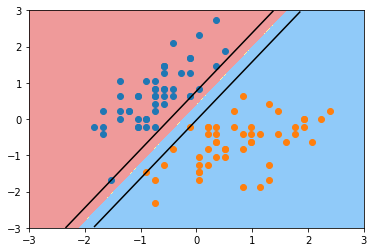

In [13]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


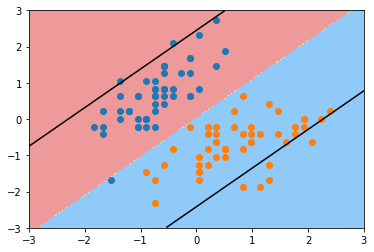

In [14]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

# 使用SVM进行分类

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [18]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [32]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_train_standard, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [37]:
y_predict = svc.predict(X_test_standard)

In [38]:
svc.score(X_test_standard, y_test)

0.9666666666666667

In [40]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average="micro")

0.9666666666666667